In [63]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [64]:
#VARIAVLE DECLARE KORLAM
BATCH_SIZE=32
IMAGE_SIZE=255
CHANNEL=3
EPOCHS=20

In [65]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    directory="PlantVillage",
    seed=123,
    shuffle=True,
image_size=[IMAGE_SIZE,IMAGE_SIZE],
batch_size=BATCH_SIZE,

)

Found 2152 files belonging to 3 classes.


In [5]:
len(dataset)

68

In [6]:
#68 BATCH SIZE
#EVERY BATCH E 32 IMAGE ASE
#TOTAL 68*32=2176, ACTUAL =2152

In [66]:
class_names= dataset.class_names

In [67]:
import numpy as np
for batch_size, label_size in dataset.take(1):
    print("Batch shape:", batch_size.shape)
    print("Labels shape:", label_size.numpy)
    print("image",batch_size[0])



Batch shape: (32, 255, 255, 3)
Labels shape: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 2, 0, 0])>>
image tf.Tensor(
[[[141.98236  115.98237  116.98237 ]
  [136.82382  110.823814 111.823814]
  [107.35246   81.35246   82.35246 ]
  ...
  [173.01381  155.01381  151.01381 ]
  [181.93741  163.93741  159.93741 ]
  [195.95111  177.95111  173.95111 ]]

 [[137.87445  111.87446  112.87446 ]
  [136.8248   110.82481  111.82481 ]
  [132.12982  106.129814 107.129814]
  ...
  [175.0646   157.0646   153.0646  ]
  [176.98244  158.98244  154.98244 ]
  [184.96088  166.96088  162.96088 ]]

 [[117.12743   91.12743   92.12743 ]
  [112.31633   86.31633   87.31633 ]
  [144.35968  118.35967  119.35967 ]
  ...
  [176.0387   158.0387   154.0387  ]
  [176.02917  158.02917  154.02917 ]
  [181.049    163.049    159.049   ]]

 ...

 [[107.330246  81.330246  80.330246]
  [145.

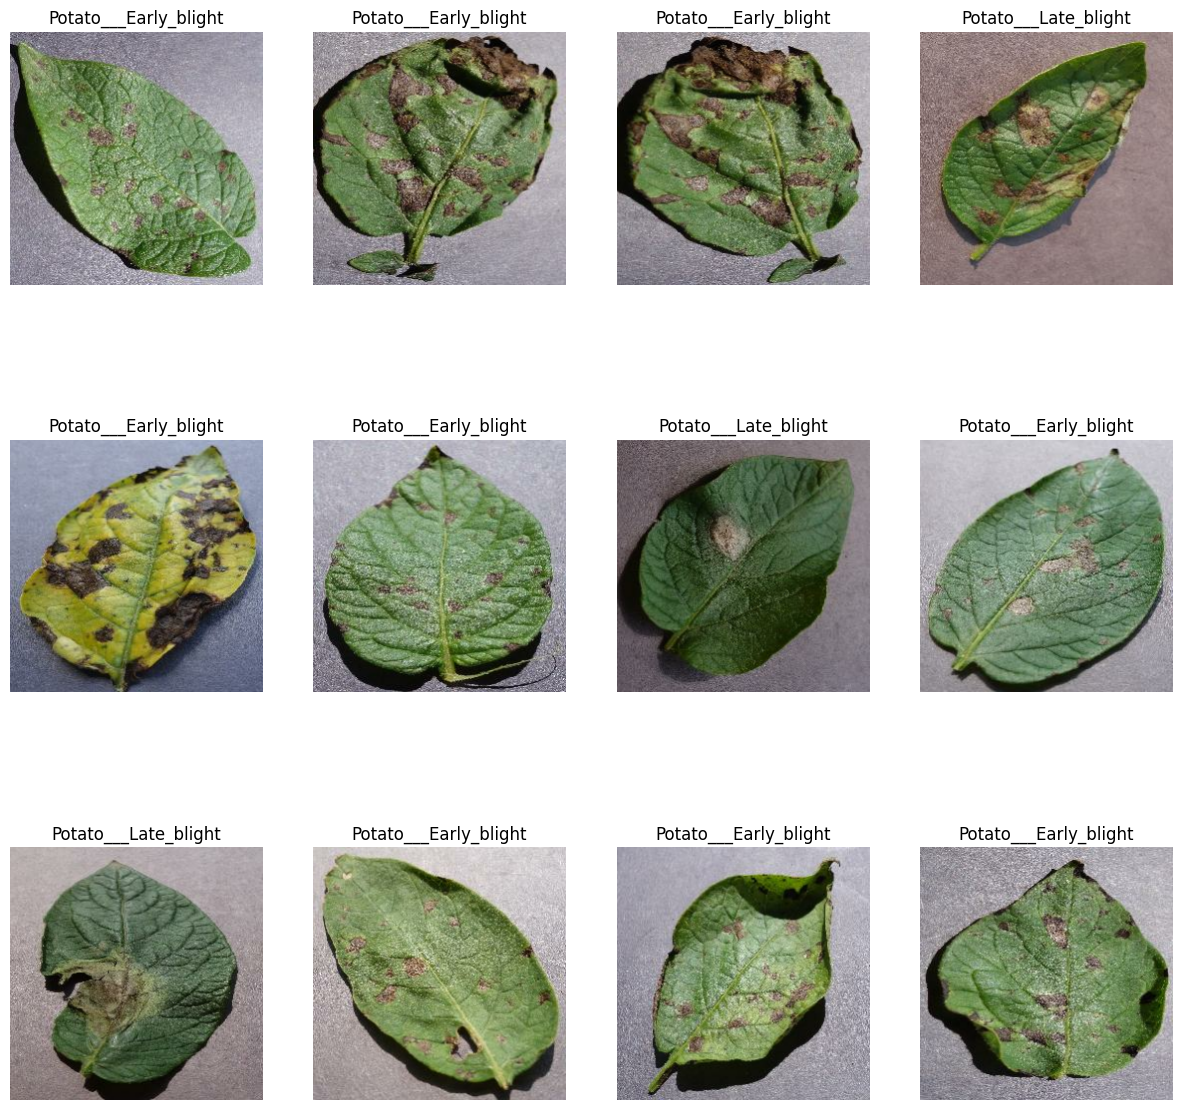

In [9]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):  # Correct variable names
    for i in range(12):  # Loop through the first 12 images
        ax= plt.subplot(3, 4, i + 1)  # Create subplots
        plt.imshow(images[i].numpy().astype('uint8'))  # Correct dtype
        plt.title(class_names[labels[i]])  # Display class names
        plt.axis('off')  # Remove axes
plt.show()  # Display the plot

<h1>dataset split function</h1>

In [10]:
len(dataset)

68

In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(54)

In [13]:
test_ds=dataset.skip(54)

In [14]:
len(test_ds)

14

In [15]:
val_size= 0.1
len(dataset) * val_size

6.800000000000001

In [16]:
val_dataset = test_ds.take(6)

In [17]:
test_ds= test_ds.skip(6)

In [18]:
pip install splitfolder

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement splitfolder (from versions: none)
ERROR: No matching distribution found for splitfolder


In [19]:
#did using deepseek
import splitfolders

# Input folder (your original dataset)
input_folder = "PlantVillage"

# Output folder (will contain train/val/test)
output_folder = "potato_split_data"

# Split into 70% train, 15% validation, 15% test
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,           # Makes the split reproducible
    ratio=(0.7, 0.15, 0.15),  # (train, val, test) ratios
    group_prefix=None,  # Don't group by prefix
    move=False          # Set to True to move files instead of copying
)

print("Successfully split the data!")

Successfully split the data!


In [20]:
len(output_folder)

17

In [21]:
#did using deepdseek

import os

def count_files(folder):
    print(f"\nChecking: {folder}")
    for subset in ["train", "val", "test"]:
        path = os.path.join(folder, subset)
        print(f"\n-- {subset.upper()} --")
        for class_name in os.listdir(path):
            class_path = os.path.join(path, class_name)
            num_files = len(os.listdir(class_path))
            print(f"{class_name}: {num_files} images")

count_files("potato_split_data")


Checking: potato_split_data

-- TRAIN --
Potato___Early_blight: 700 images
Potato___healthy: 106 images
Potato___Late_blight: 700 images

-- VAL --
Potato___Early_blight: 150 images
Potato___healthy: 22 images
Potato___Late_blight: 150 images

-- TEST --
Potato___Early_blight: 150 images
Potato___healthy: 24 images
Potato___Late_blight: 150 images


In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [68]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)





In [69]:
for batch_size, label_size in dataset.take(1):
    print("Batch shape:", batch_size.shape)
    print("Labels shape:", label_size.numpy)
    print("image",batch_size[0])


Batch shape: (32, 255, 255, 3)
Labels shape: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 1, 0])>>
image tf.Tensor(
[[[162.90582  160.90582  171.90582 ]
  [128.81645  126.81645  137.81645 ]
  [108.07034  106.07034  117.07034 ]
  ...
  [163.0018   161.0018   175.0018  ]
  [158.04297  156.04297  170.04297 ]
  [153.03915  151.03915  165.03915 ]]

 [[148.61253  146.61253  157.61253 ]
  [ 98.383224  96.383224 107.38329 ]
  [144.12883  142.12883  153.1406  ]
  ...
  [158.95512  156.95512  170.95512 ]
  [164.95905  162.95905  176.95905 ]
  [167.97064  165.97064  179.97064 ]]

 [[100.59103   98.59103  109.610634]
  [117.39228  115.39228  126.42354 ]
  [186.45088  184.45088  197.45088 ]
  ...
  [162.981    160.981    174.981   ]
  [163.965    161.965    175.965   ]
  [163.94124  161.94124  175.94124 ]]

 ...

 [[141.92764  137.92764  152.92764 ]
  [120.

In [37]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
  Resizing(IMAGE_SIZE, IMAGE_SIZE),
  Rescaling(1./255),  # Or Rescaling(scale=1./255)
])

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [45]:
train_ds=train_ds.map(lambda x,y: (data_augmentation(x, training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL)  # exclude batch size!

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
], name="resize_and_rescale")

model = models.Sequential([
    layers.Input(shape=input_shape),         # 👈 define input shape here
    resize_and_rescale,                      # 👈 then this works fine
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [54]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resize_and_rescale (Sequential)      │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_83 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.4502 - loss: 0.9248 - val_accuracy: 0.6042 - val_loss: 0.7397
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6116 - loss: 0.7603 - val_accuracy: 0.6719 - val_loss: 0.6312
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7558 - loss: 0.5556 - val_accuracy: 0.7917 - val_loss: 0.4469
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.8320 - loss: 0.4034 - val_accuracy: 0.8802 - val_loss: 0.2944
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.8849 - loss: 0.2883 - val_accuracy: 0.8542 - val_loss: 0.3601
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 346s 6s/step - accuracy: 0.8910 - loss: 0.2727 - val_accuracy: 0.9219 - val_loss: 0.2274
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9300 - loss: 0.1879 - val_accuracy: 0.8333 - val_loss: 0.4593
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9167 - loss: 0.1978 - val_accuracy: 0.9271 - val_

In [70]:
model.save('model.h5')

In [71]:
model = tf.keras.models.load_model('model.h5')

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
predicted label: Potato___Early_blight


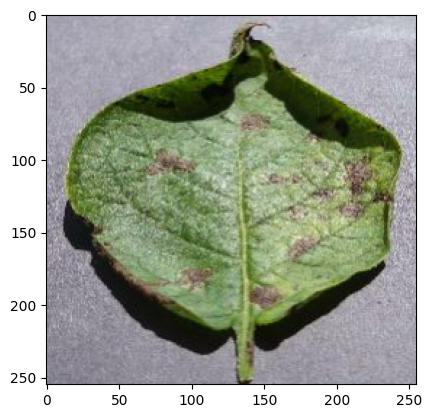

In [74]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

<h1> function to predict more images</h1>

In [87]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


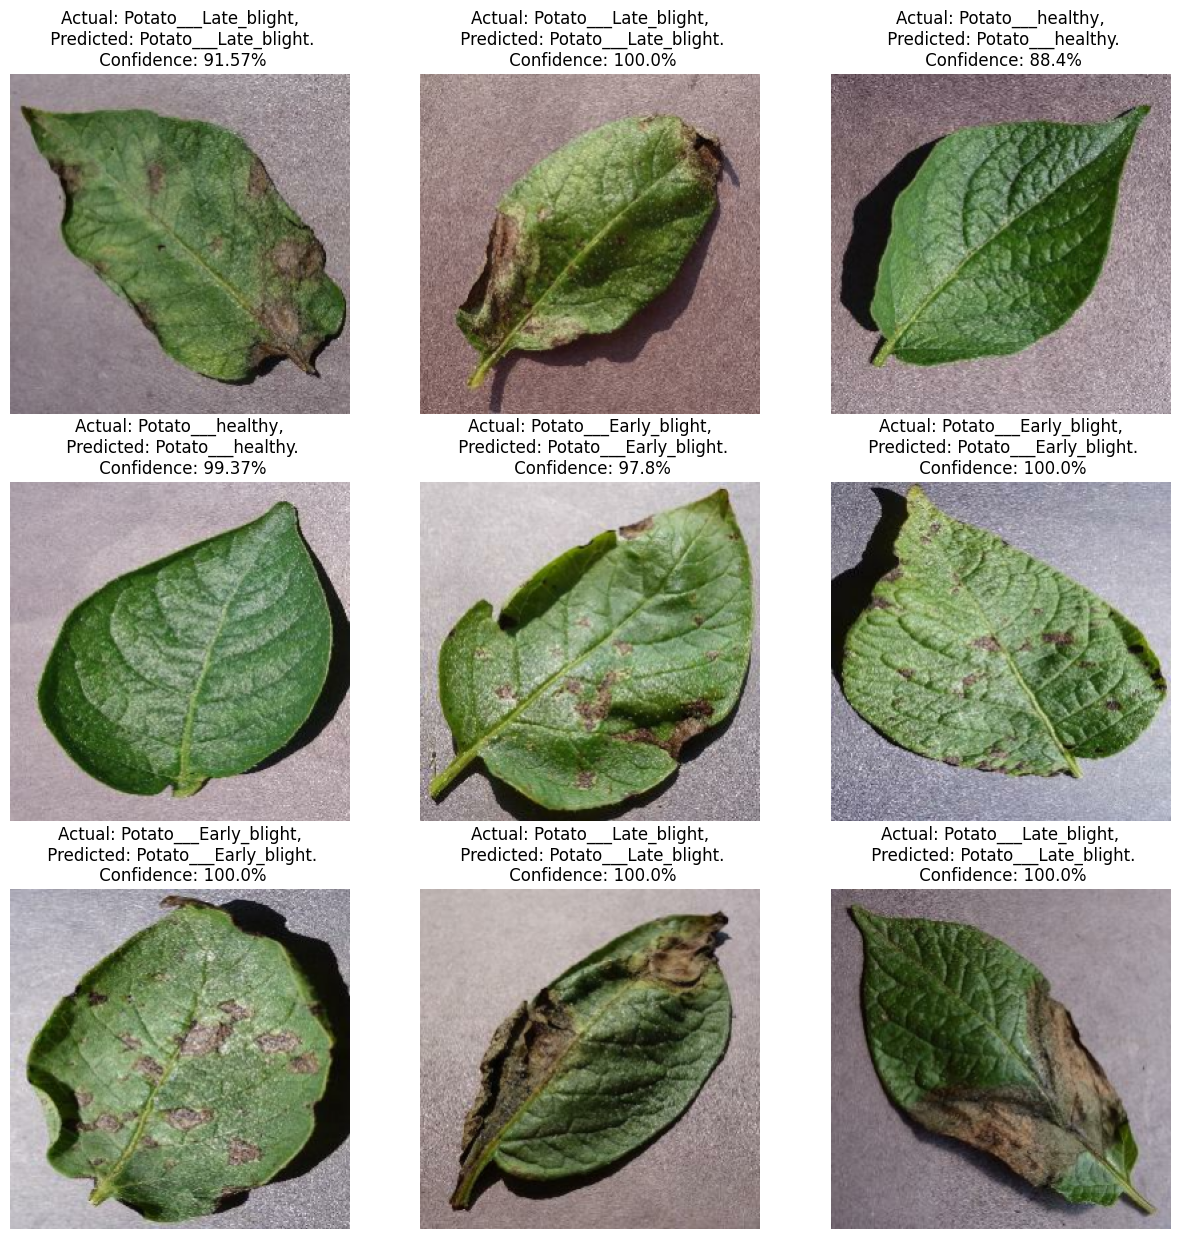

In [88]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [89]:
import tensorflow as tf
print(tf.__version__)

2.19.0
